# Notebook Contents

<a id='another_cell'>test</a>

# <a id='xxx'>1. Set Up </a>

In [ ]:
soltuion: xxxxx

### Import Packages and Options

In [143]:
## ===> General <===
##
import os

## ===> Data Management <===
##
import numpy as np
import pandas as pd

## ===> Data Visualization <===
##
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## default text font size on graphs
plt.rcParams.update({'font.size': 16})

## ===> Analysis and Modeling <===
##
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.iolib.summary2 import summary_col
import scipy.stats as st
##
## For testing
##
from statsmodels.sandbox.stats.runs import cochrans_q


## Set an option for the number of Pandas columns to display.
## 
pd.set_option('display.max_columns', 20)

### Default Variables and Functions

variables

In [144]:
## NEW LINE
##
newLine = "\n"


## FONT SIZES
##
font_title = 20

## COLORS
##

## tabel bar colors
bar="lightblue"


## FORMATS
##
## format decimal to percent
to_Pct = '{:0.1%}'

## 
p_value = '{:0.4f}'


## DataFrame styles
##
tbl_styles = \
    [ {
    'selector': 'caption',
    'props': [
        ('color', 'darkblue'),
        ('font-size', '18px')
             ] 
    } ]

functions

In [145]:
## Misc functions
##
def footer(txt,obj,ypos=-0.3):
    obj.annotate( txt, ( 0, 0 ), ( 0, ypos ), xycoords = 'axes fraction', fontsize='small')
    
    
def tick_labels( tick ):
    if tick == 'y':
        vals = ax.get_yticks()
        ax.set_yticklabels( format.format( x ) for x in vals )
    else:
        vals = ax.get_xticks()
        ax.set_xticklabels( format.format( x ) for x in vals )
        

## Total Rows and Columns
def total(df):
    print("Total Columns: {}".format(df.shape[1]))
    print("Total Rows: {}".format(df.shape[0]))

# 2. Access Data

Run the read_csv method to access.....

In [146]:
## file name
file="yogurt.csv"

## read csv file
df_raw = pd.read_csv(file)

In [147]:
df_raw.head()

,RID,Weights,Segment,Brand,Buy Client's Brand,Average price pay for the yogurt most typically purchased,Price Paid Range,Price Mid-Point,Number of Units Purchased,Number of Units Purchased Groups,...,Recommand,Purchase Again,Gender,Age,Ethnicity,Education,Employment Status,Household Income,Descriptive Word,x
0,45,72375.3722,Health Fanatic,Major Competitor,Not Buy,$1.18,$1.60 - $1.69,$1.65,5,Low,...,Neither Recommand nor Not Recommand,Extremely Likely,Male,51 to 60 years old,African-American,Less than 9th Grade,Employed in upper-management,"$50,000 - $59,999",Delicious,Male
1,46,90579.7452,Health Fanatic,C,Not Buy,$1.02,$1.60 - $1.69,$1.65,8,High,...,May Recommand,Somewhat Likely,Male,51 to 60 years old,African-American,High School Graduate or equivalent,Employed as a mid-level manager,"$200,000 or more",Tasty,Male
2,49,36187.6861,Health-Conscious,C,Not Buy,$1.23,$1.00 - $1.09,$1.05,9,High,...,Neither Recommand nor Not Recommand,Extremely Likely,Female,36 to 40 years old,African-American,Bachelors Degree,"Employed, but not at a management level","$50,000 - $59,999",Fulfilling,Female
3,51,67686.7937,Dessert Lover,Major Competitor,Not Buy,$1.11,$1.00 - $1.09,$1.05,8,Medium,...,May Recommand,Extremely Likely,Female,51 to 60 years old,African-American,Graduate or Professional Degree,Employed as a mid-level manager,"$50,000 - $59,999",Delicious,Female
4,52,168410.2820,Normal Food Consumer,Major Competitor,Not Buy,$1.28,$1.30 - $1.39,$1.35,6,Medium,...,May Recommand,Extremely Likely,Male,36 to 40 years old,African-American,Bachelors Degree,Retired,"$60,000 - $74,999",Healthy,Male


# 3. Explore and Prepare Table

In [148]:
## total number of rows and columns
total(df_raw)

Total Columns: 65
Total Rows: 2000


In [149]:
## subset table for key columns
##
keyCols = [ 'RID', 'Segment', 'Brand', 
            'Average price pay for the yogurt most typically purchased', 
            'Number of Units Purchased',
            'Banana', 'Blueberry', 'Boysenberry', 'Strawberry', 
            'Vanilla', 'Coffee', 'Raspberry', 'Age', 'Gender' ]

df = df_raw[keyCols].copy()

In [150]:
## total number of rows in new table
##
total(df)

Total Columns: 14
Total Rows: 2000


In [151]:
## Preview table
##
df.head()

,RID,Segment,Brand,Average price pay for the yogurt most typically purchased,Number of Units Purchased,Banana,Blueberry,Boysenberry,Strawberry,Vanilla,Coffee,Raspberry,Age,Gender
0,45,Health Fanatic,Major Competitor,$1.18,5,No,Yes,Yes,No,No,Yes,No,51 to 60 years old,Male
1,46,Health Fanatic,C,$1.02,8,No,Yes,No,No,No,No,Yes,51 to 60 years old,Male
2,49,Health-Conscious,C,$1.23,9,No,Yes,Yes,No,Yes,No,No,36 to 40 years old,Female
3,51,Dessert Lover,Major Competitor,$1.11,8,No,Yes,Yes,No,No,No,Yes,51 to 60 years old,Female
4,52,Normal Food Consumer,Major Competitor,$1.28,6,No,Yes,Yes,No,No,No,No,36 to 40 years old,Male


In [152]:
## rename columns
##
newColsNames = [ 'RID', 'Segment', 'Brand', 
                 'Price', 'Units',
                 'Banana', 'Blueberry', 'Boysenberry', 'Strawberry', 
                 'Vanilla', 'Coffee', 'Raspberry', 'Age', 'Gender' ]

df.columns = newColsNames

df.head()

,RID,Segment,Brand,Price,Units,Banana,Blueberry,Boysenberry,Strawberry,Vanilla,Coffee,Raspberry,Age,Gender
0,45,Health Fanatic,Major Competitor,$1.18,5,No,Yes,Yes,No,No,Yes,No,51 to 60 years old,Male
1,46,Health Fanatic,C,$1.02,8,No,Yes,No,No,No,No,Yes,51 to 60 years old,Male
2,49,Health-Conscious,C,$1.23,9,No,Yes,Yes,No,Yes,No,No,36 to 40 years old,Female
3,51,Dessert Lover,Major Competitor,$1.11,8,No,Yes,Yes,No,No,No,Yes,51 to 60 years old,Female
4,52,Normal Food Consumer,Major Competitor,$1.28,6,No,Yes,Yes,No,No,No,No,36 to 40 years old,Male


In [153]:
## Check the data types in the table
##
df.dtypes

RID             int64
Segment        object
Brand          object
Price          object
Units           int64
Banana         object
Blueberry      object
Boysenberry    object
Strawberry     object
Vanilla        object
Coffee         object
Raspberry      object
Age            object
Gender         object
dtype: object

In [154]:
## prepare columns
##
## a. Price column needs to be converted to numeric by removing $

df.Price = df.Price.str.strip('$').astype('float')

df.head()

,RID,Segment,Brand,Price,Units,Banana,Blueberry,Boysenberry,Strawberry,Vanilla,Coffee,Raspberry,Age,Gender
0,45,Health Fanatic,Major Competitor,1.18,5,No,Yes,Yes,No,No,Yes,No,51 to 60 years old,Male
1,46,Health Fanatic,C,1.02,8,No,Yes,No,No,No,No,Yes,51 to 60 years old,Male
2,49,Health-Conscious,C,1.23,9,No,Yes,Yes,No,Yes,No,No,36 to 40 years old,Female
3,51,Dessert Lover,Major Competitor,1.11,8,No,Yes,Yes,No,No,No,Yes,51 to 60 years old,Female
4,52,Normal Food Consumer,Major Competitor,1.28,6,No,Yes,Yes,No,No,No,No,36 to 40 years old,Male


In [155]:
## recheck data types
##
df.dtypes

RID              int64
Segment         object
Brand           object
Price          float64
Units            int64
Banana          object
Blueberry       object
Boysenberry     object
Strawberry      object
Vanilla         object
Coffee          object
Raspberry       object
Age             object
Gender          object
dtype: object

Text(0.5, 1.0, 'Columns with less than 20 unique values')

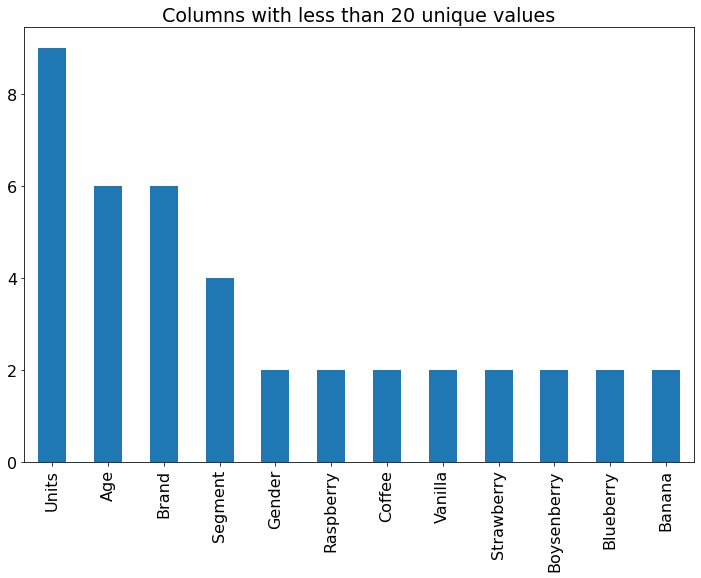

In [156]:
## number of unique values for each column less than 20
##
n = df.nunique()
lt_twenty = n[n < 20].sort_values(ascending=False)

lt_twenty.plot(kind='bar', figsize=(12,8))

plt.title("Columns with less than 20 unique values")

View the unique values and counts for each column with 20 unique values or less.

Units
7     638
6     521
8     392
5     250
9     127
4      44
10     25
11      2
12      1
Name: Units, dtype: int64


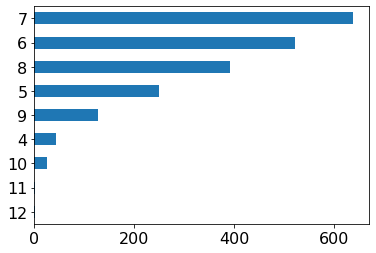



Age
51 to 60 years old       402
68 years old and over    355
41 to 50 years old       353
61 to 67 years old       351
36 to 40 years old       343
18 to 35 years old       196
Name: Age, dtype: int64


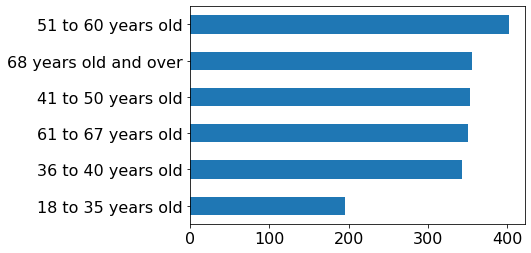



Brand
Client              651
C                   538
Major Competitor    407
D                   202
E                   106
G                    89
Name: Brand, dtype: int64


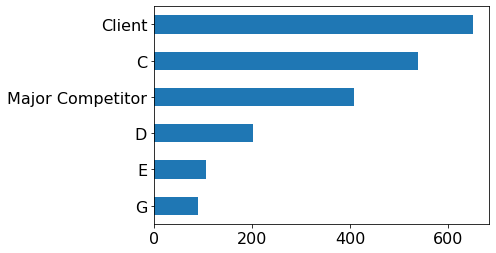



Segment
Normal Food Consumer    633
Health-Conscious        538
Dessert Lover           474
Health Fanatic          355
Name: Segment, dtype: int64


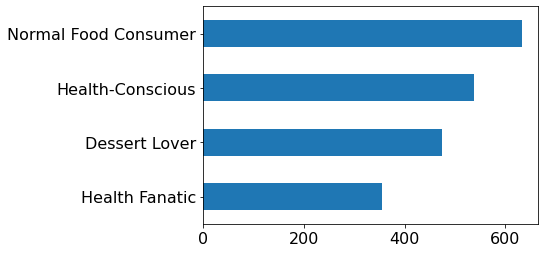



Gender
Female    1347
Male       653
Name: Gender, dtype: int64


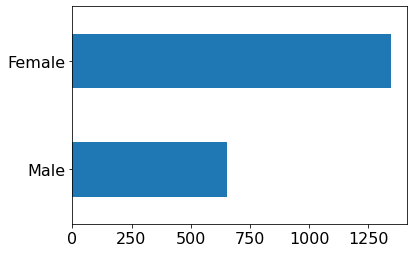



Raspberry
Yes    1041
No      959
Name: Raspberry, dtype: int64


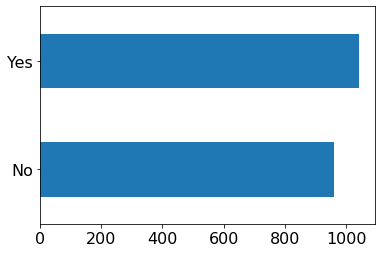



Coffee
No     1502
Yes     498
Name: Coffee, dtype: int64


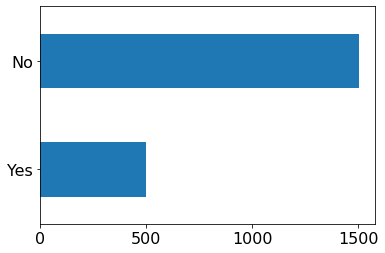



Vanilla
No     1282
Yes     718
Name: Vanilla, dtype: int64


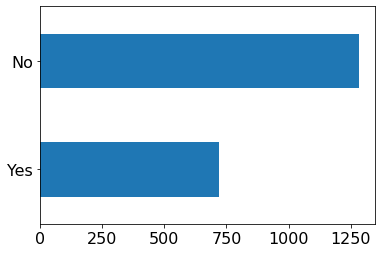



Strawberry
Yes    1090
No      910
Name: Strawberry, dtype: int64


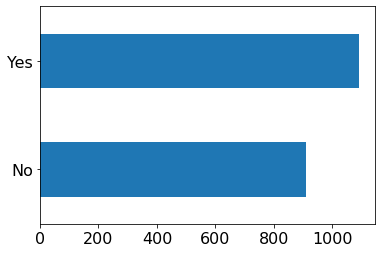



Boysenberry
Yes    1227
No      773
Name: Boysenberry, dtype: int64


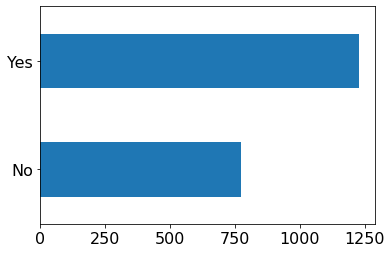



Blueberry
Yes    1370
No      630
Name: Blueberry, dtype: int64


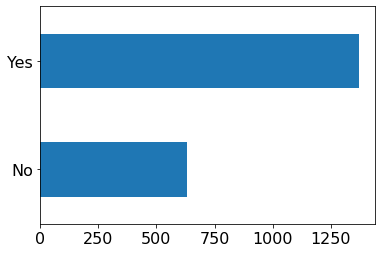



Banana
No     1579
Yes     421
Name: Banana, dtype: int64


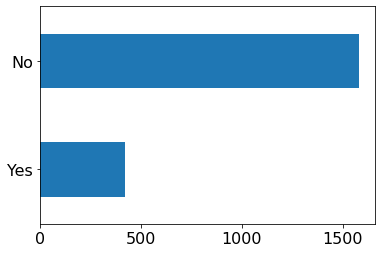

In [157]:
for i in lt_twenty.index:
    print(i)
    print(df[i].value_counts())
    df[i].value_counts(ascending=True).plot(kind='barh')
    plt.show()
    print('\n')

In [158]:
## final preview of the data
##
df.head()

,RID,Segment,Brand,Price,Units,Banana,Blueberry,Boysenberry,Strawberry,Vanilla,Coffee,Raspberry,Age,Gender
0,45,Health Fanatic,Major Competitor,1.18,5,No,Yes,Yes,No,No,Yes,No,51 to 60 years old,Male
1,46,Health Fanatic,C,1.02,8,No,Yes,No,No,No,No,Yes,51 to 60 years old,Male
2,49,Health-Conscious,C,1.23,9,No,Yes,Yes,No,Yes,No,No,36 to 40 years old,Female
3,51,Dessert Lover,Major Competitor,1.11,8,No,Yes,Yes,No,No,No,Yes,51 to 60 years old,Female
4,52,Normal Food Consumer,Major Competitor,1.28,6,No,Yes,Yes,No,No,No,No,36 to 40 years old,Male


## 4. Analyze Demographics

### a. Gender Analysis

In [159]:
## Find gender distribution by percentage
##
x = df.Gender.value_counts(normalize=True)

## turn series to dataFrame
##
dfGender = pd.DataFrame(x)

## View distribution
##

dfGender.style.set_caption('Gender Distribution').\
         bar(color=bar, subset=['Gender'], align='zero', vmax=1). \
         format(to_Pct).\
         set_table_styles( tbl_styles ) 

,Gender
Female,67.3%
Male,32.6%


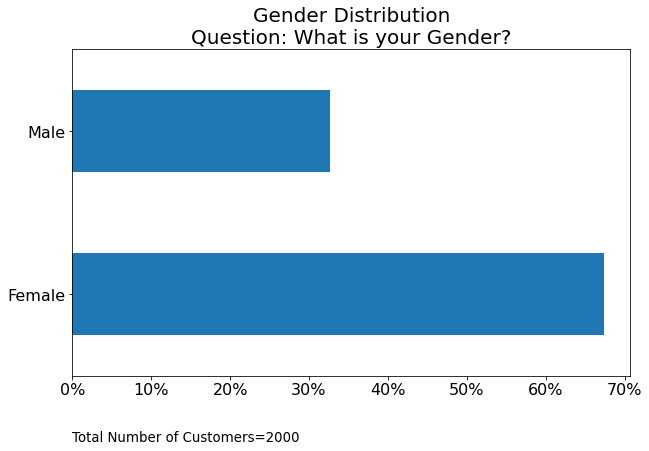

In [160]:
axGender = dfGender.plot(kind='barh', figsize=(10,6), legend=False)
axGender.set_title('Gender Distribution' + newLine + "Question: What is your Gender?", fontsize=font_title)
axGender.xaxis.set_major_formatter(ticker.PercentFormatter(1))

txt="Total Number of Customers={}".format(df.shape[0])
footer(txt,axGender, ypos=-.2)

### b.  Age Analysis

In [161]:
## Find gender distribution by percentage
##
x = df.Age.value_counts(normalize=True)

## turn series to dataFrame
##
dfAge = pd.DataFrame(x)


## Rearrange columns based on order for age group
##
ageOrder=[ '18 to 35 years old', 
           '36 to 40 years old', 
           '41 to 50 years old',
           '51 to 60 years old', 
           '61 to 67 years old', 
           '68 years old and over' ]

dfAge = dfAge.reindex(ageOrder)


## View distribution
##

dfAge.style.set_caption('Age Distribution').\
           bar(color=bar, subset=['Age'], align='zero'). \
           format(to_Pct).\
           set_table_styles( tbl_styles ) 

,Age
18 to 35 years old,9.8%
36 to 40 years old,17.2%
41 to 50 years old,17.6%
51 to 60 years old,20.1%
61 to 67 years old,17.5%
68 years old and over,17.8%


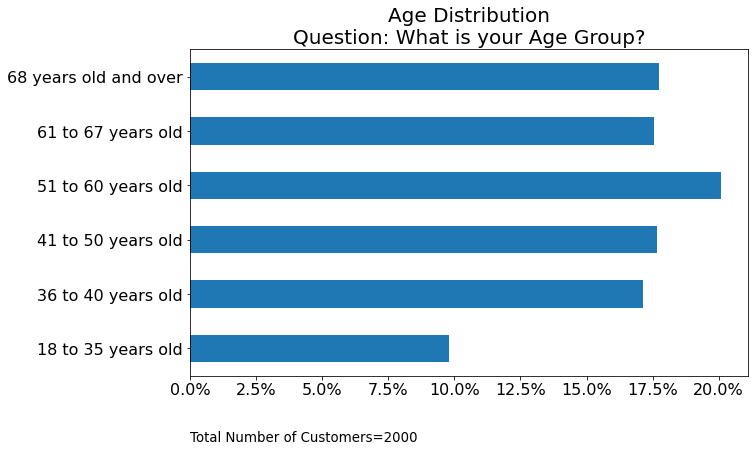

In [162]:
axAge = dfAge.plot(kind='barh', figsize=(10,6), legend=False)
axAge.set_title('Age Distribution' + newLine + "Question: What is your Age Group?", fontsize=font_title)
axAge.xaxis.set_major_formatter(ticker.PercentFormatter(1))

txt="Total Number of Customers={}".format(df.shape[0])
footer(txt,axAge, ypos=-.2)

### c. Age by Gender Analysis

In [163]:
df.head()

,RID,Segment,Brand,Price,Units,Banana,Blueberry,Boysenberry,Strawberry,Vanilla,Coffee,Raspberry,Age,Gender
0,45,Health Fanatic,Major Competitor,1.18,5,No,Yes,Yes,No,No,Yes,No,51 to 60 years old,Male
1,46,Health Fanatic,C,1.02,8,No,Yes,No,No,No,No,Yes,51 to 60 years old,Male
2,49,Health-Conscious,C,1.23,9,No,Yes,Yes,No,Yes,No,No,36 to 40 years old,Female
3,51,Dessert Lover,Major Competitor,1.11,8,No,Yes,Yes,No,No,No,Yes,51 to 60 years old,Female
4,52,Normal Food Consumer,Major Competitor,1.28,6,No,Yes,Yes,No,No,No,No,36 to 40 years old,Male


In [164]:
## View age by gender survey demographics
##
ageByGender = pd.crosstab(df.Age,df.Gender, normalize=True)

ageByGender.style.set_caption("Age by Gender"). \
            bar(color=bar, align='zero'). \
            set_table_styles(tbl_styles). \
            format(to_Pct)

Gender,Female,Male
Age,,
18 to 35 years old,7.2%,2.5%
36 to 40 years old,10.8%,6.3%
41 to 50 years old,12.0%,5.7%
51 to 60 years old,12.7%,7.4%
61 to 67 years old,12.3%,5.2%
68 years old and over,12.2%,5.5%


**Convert age by gender table from wide form to long form**


In [165]:
## 1. remove age as index
##
ageByGender_wide = ageByGender.reset_index()

In [166]:
## 2. transpose the table
##
ageByGender_long = pd.melt(ageByGender_wide,id_vars=["Age"], 
                           value_vars=['Female','Male'],   ## columns to transpose
                           var_name=['Gender'])

ageByGender_long.head(10)

,Age,Gender,value
0,18 to 35 years old,Female,0.0725
1,36 to 40 years old,Female,0.1085
2,41 to 50 years old,Female,0.1200
3,51 to 60 years old,Female,0.1265
4,61 to 67 years old,Female,0.1235
5,68 years old and over,Female,0.1225
6,18 to 35 years old,Male,0.0255
7,36 to 40 years old,Male,0.0630
8,41 to 50 years old,Male,0.0565
9,51 to 60 years old,Male,0.0745


In [167]:
## 3. Rename the value column to percent
## 
ageByGender_long.rename(columns={'value':'Percent'}, inplace=True)

## 4. Format the percent column to percents
##
ageByGender_long.style.format({'Percent':to_Pct})

,Age,Gender,Percent
0,18 to 35 years old,Female,7.2%
1,36 to 40 years old,Female,10.8%
2,41 to 50 years old,Female,12.0%
3,51 to 60 years old,Female,12.7%
4,61 to 67 years old,Female,12.3%
5,68 years old and over,Female,12.2%
6,18 to 35 years old,Male,2.5%
7,36 to 40 years old,Male,6.3%
8,41 to 50 years old,Male,5.7%
9,51 to 60 years old,Male,7.4%


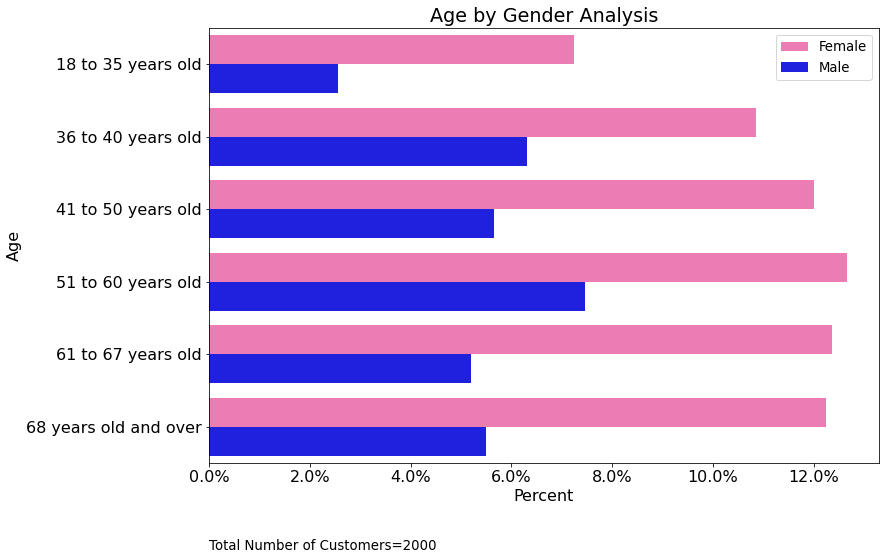

In [168]:
axAgeByGender=plt.figure(figsize=(12, 8))
axAgeByGender=sns.barplot(data=ageByGender_long, x='Percent',y='Age', hue='Gender', palette=['hotpink','blue'])

## options
axAgeByGender.xaxis.set_major_formatter(ticker.PercentFormatter(1))
axAgeByGender.set_title('Age by Gender Analysis')
axAgeByGender.legend(fontsize='small')

txt="Total Number of Customers={}".format(df.shape[0])
footer(txt,axAgeByGender, ypos=-.2)

In [59]:
ageByGender

Gender,Female,Male
Age,,
18 to 35 years old,0.0725,0.0255
36 to 40 years old,0.1085,0.0630
41 to 50 years old,0.1200,0.0565
51 to 60 years old,0.1265,0.0745
61 to 67 years old,0.1235,0.0520
68 years old and over,0.1225,0.0550


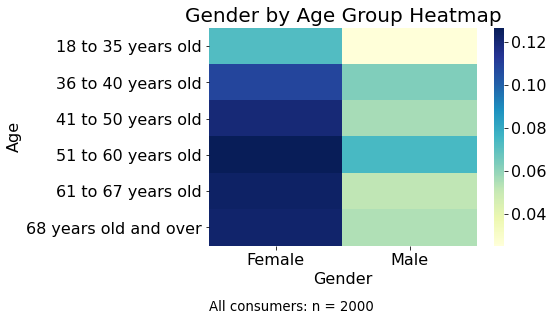

In [51]:
axHeat = sns.heatmap( ageByGender, cmap = "YlGnBu" )
axHeat.set_title( 'Gender by Age Group Heatmap', fontsize = font_title )

txt = 'All consumers: n = ' + str( df.shape[ 0 ] )
footer(txt,axHeat, ypos=-.3)

In [ ]:
x = df.query( "Gender == 'Male'")
males = x.Age.value_counts().reindex( lst_odr )
##
ax1 = fig.add_axes( [ 0, 0, 0.5, 0.5 ], aspect = 1 )
ax1.pie( males, labels = lst_odr, startangle = 90, radius = 1.75, autopct = '%1.1f%%' )
ax1.set( title = "Males" )
ax1.set_title( 'Males', pad = 50, fontsize = 20 )
base = 'Base: All male consumers; n = ' + str( sum( males ) ) + '\nQuestion: What is your age?'
ax1.annotate( base, (0,0), (0, -0.6), xycoords = 'axes fraction' );
##
## ===> Females <===
##
x = df.query( "Gender == 'Female'")
females = x.Age.value_counts().reindex( lst_odr )
##
ax2 = fig.add_axes( [ 0.95, 0, 0.5, 0.5 ], aspect = 1 )
ax2.pie( females, labels = lst_odr, startangle = 90, radius = 1.75, autopct = '%1.1f%%' )
ax2.set_title( 'Females', pad = 50, fontsize = 20 );
base = 'Base: All female consumers; n = ' + str( sum( females ) ) + '\nQuestions: What is your age?'
ax2.annotate( base, (0,0), (0, -0.6), xycoords = 'axes fraction' );

In [181]:
ageByGender_counts = pd.crosstab(df.Age,df.Gender)
ageByGender_counts

Gender,Female,Male
Age,,
18 to 35 years old,145,51
36 to 40 years old,217,126
41 to 50 years old,240,113
51 to 60 years old,253,149
61 to 67 years old,247,104
68 years old and over,245,110


[None, None, None, None, None, None, None, None, None, None, None, None]

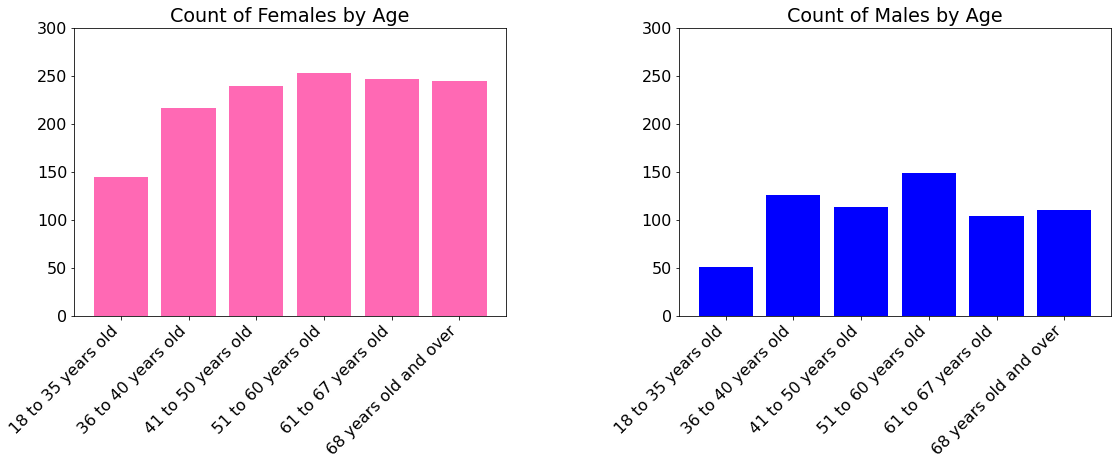

In [248]:
## Create figure
##
fig = plt.figure(figsize=(12,8))


## Find max value of y axis
##
max_y = int(round(max(ageByGender_counts.max().to_list()), -2))


## Add females axes
##
ax1 = fig.add_axes([0,0,.5,.5])
ax1.bar(ageByGender_counts.index, ageByGender_counts.Female, color='hotpink',)

plt.ylim(top=max_y)
plt.title("Count of Females by Age")
plt.xticks(rotation = 45)
plt.setp(ax1.xaxis.get_majorticklabels(), ha='right')


## Add males axes
##
ax2 = fig.add_axes( [ 0.7, 0, 0.5, 0.5 ])
ax2.bar(ageByGender_counts.index, ageByGender_counts.Male, color='blue')

plt.ylim(top=max_y)
plt.title("Count of Males by Age")
plt.xticks(rotation = 45)
plt.setp(ax2.xaxis.get_majorticklabels(), ha='right')

## 5. Analyze Flavor Preference

In [84]:
df.head()

,RID,Segment,Brand,Price,Units,Banana,Blueberry,Boysenberry,Strawberry,Vanilla,Coffee,Raspberry,Age,Gender
0,45,Health Fanatic,Major Competitor,1.18,5,No,Yes,Yes,No,No,Yes,No,51 to 60 years old,Male
1,46,Health Fanatic,C,1.02,8,No,Yes,No,No,No,No,Yes,51 to 60 years old,Male
2,49,Health-Conscious,C,1.23,9,No,Yes,Yes,No,Yes,No,No,36 to 40 years old,Female
3,51,Dessert Lover,Major Competitor,1.11,8,No,Yes,Yes,No,No,No,Yes,51 to 60 years old,Female
4,52,Normal Food Consumer,Major Competitor,1.28,6,No,Yes,Yes,No,No,No,No,36 to 40 years old,Male


### 5a. Flavor Overview

In [249]:
flavorNames = ['Banana', 'Blueberry', 'Boysenberry', 
           'Strawberry', 'Vanilla', 'Coffee', 'Raspberry']

print('Total Number of flavors:{}'.format(len(flavorNames)))
print('Yogurt Flavors: {}'.format(flavorNames))

Total Number of flavors:7
Yogurt Flavors: ['Banana', 'Blueberry', 'Boysenberry', 'Strawberry', 'Vanilla', 'Coffee', 'Raspberry']


### 5b. Prepare Data

Recode the Yes/No values to 1's and 0's to summarize the data.

In [ ]:
## New dataframe for flavors
##
flavors_df=df.copy()

## Dictionary to recode Yes=1, No=0
## 
recode_yn = {'Yes':1, 'No':0}

## Recode for each column using the dictionary
##
for i in flavorNames:
    flavors_df.replace({i:recode_yn}, inplace=True)

In [272]:
flavors_df.head()

,RID,Segment,Brand,Price,Units,Banana,Blueberry,Boysenberry,Strawberry,Vanilla,Coffee,Raspberry,Age,Gender,Total
0,45,Health Fanatic,Major Competitor,1.18,5,0,1,1,0,0,1,0,51 to 60 years old,Male,3
1,46,Health Fanatic,C,1.02,8,0,1,0,0,0,0,1,51 to 60 years old,Male,2
2,49,Health-Conscious,C,1.23,9,0,1,1,0,1,0,0,36 to 40 years old,Female,3
3,51,Dessert Lover,Major Competitor,1.11,8,0,1,1,0,0,0,1,51 to 60 years old,Female,3
4,52,Normal Food Consumer,Major Competitor,1.28,6,0,1,1,0,0,0,0,36 to 40 years old,Male,2


In [273]:
flavors_df.dtypes

RID              int64
Segment         object
Brand           object
Price          float64
Units            int64
Banana           int64
Blueberry        int64
Boysenberry      int64
Strawberry       int64
Vanilla          int64
Coffee           int64
Raspberry        int64
Age             object
Gender          object
Total            int64
dtype: object

### 5c. Analyze Total Yogurt Flavors Purchased

Create a new column to sum if a flavor was chosen for each row.

In [257]:
flavors_df['Total']=flavors_df[flavorNames].sum(axis=1)

In [258]:
flavors_df.head()

,RID,Segment,Brand,Price,Units,Banana,Blueberry,Boysenberry,Strawberry,Vanilla,Coffee,Raspberry,Age,Gender,Total
0,45,Health Fanatic,Major Competitor,1.18,5,0,1,1,0,0,1,0,51 to 60 years old,Male,3
1,46,Health Fanatic,C,1.02,8,0,1,0,0,0,0,1,51 to 60 years old,Male,2
2,49,Health-Conscious,C,1.23,9,0,1,1,0,1,0,0,36 to 40 years old,Female,3
3,51,Dessert Lover,Major Competitor,1.11,8,0,1,1,0,0,0,1,51 to 60 years old,Female,3
4,52,Normal Food Consumer,Major Competitor,1.28,6,0,1,1,0,0,0,0,36 to 40 years old,Male,2


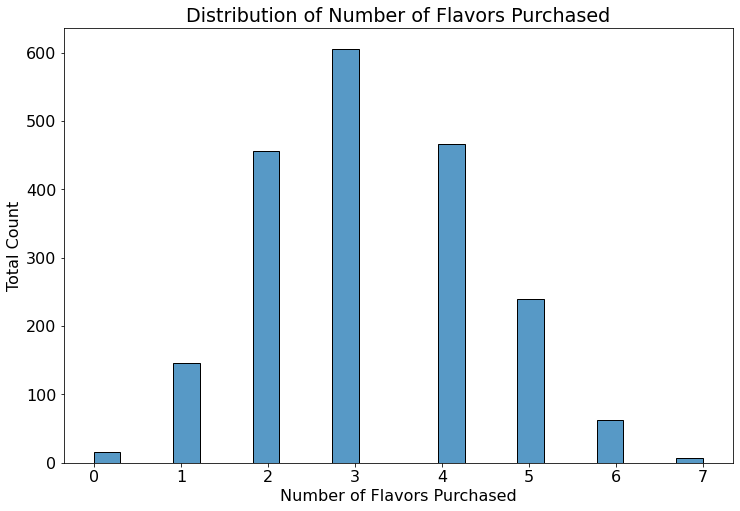

In [293]:
fig, ax = plt.subplots(figsize=(12,8))

ax = sns.histplot(flavors_df, x="Total")
ax.set_title("Distribution of Number of Flavors Purchased")
ax.set(ylabel="Total Count", xlabel="Number of Flavors Purchased")
ax.set_xticks(range(len(flavorNames)+1))

### 5d. Analyze Flavors

Text(0.5, 1.0, 'Total number of flavors chosen')

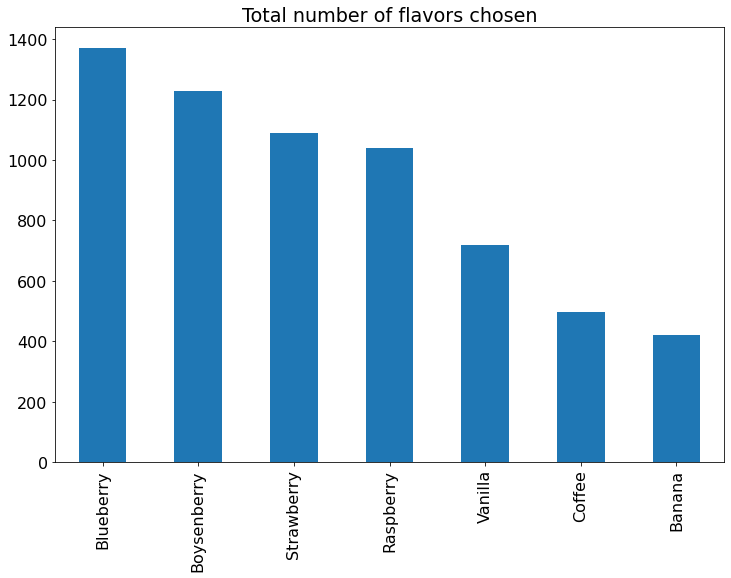

In [278]:
flavors_df[flavorNames].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,8))
plt.title("Total number of flavors chosen")